# Comparing models
<hr>

Try build a model from a simple, improve on it then compare the models.

- <a href="#model_1">model_1</a>: a simple model
- <a href="#model_2">model_2</a>: 2 layers, 100 epochs 
- <a href="#model_3">model_3</a>: 2 layers, adam optimizer, lr=0.01 

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
X = tf.range(-100, 100, 4)
y = X + 10

X,y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96])>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

In [3]:
# split into train and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

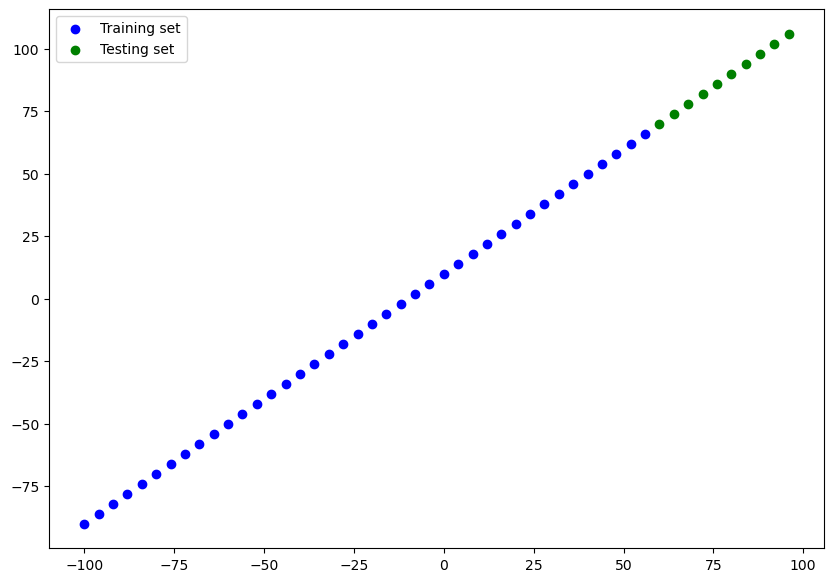

In [4]:
# plot the splited sets
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c='b', label="Training set")
plt.scatter(X_test, y_test, c='g', label="Testing set")
plt.legend()

<div id="model_1"></div>

## Model 1

In [6]:
tf.random.set_seed(42)

# 1. build the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. compile model
model_1.compile(loss=tf.keras.losses.mae, 
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae']
               )

# 3. fit model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 75.3456 - mae: 75.3456
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 40.0094 - mae: 40.0094
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 8.9711 - mae: 8.9711
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 9.4532 - mae: 9.4532
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.3412 - mae: 10.3412
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.5862 - mae: 9.5862
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.7037 - mae: 8.7037
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0759 - mae: 9.0759
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 19.0452 - mae: 19.0452
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.2928 - mae: 10.2928
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - los

2/2 [==============================] - 0s 4ms/step - loss: 10.6737 - mae: 10.6737
Epoch 89/100
2/2 [==============================] - 0s 4ms/step - loss: 7.2834 - mae: 7.2834
Epoch 90/100
2/2 [==============================] - 0s 4ms/step - loss: 12.8158 - mae: 12.8158
Epoch 91/100
2/2 [==============================] - 0s 4ms/step - loss: 7.4947 - mae: 7.4947
Epoch 92/100
2/2 [==============================] - 0s 4ms/step - loss: 6.7678 - mae: 6.7678
Epoch 93/100
2/2 [==============================] - 0s 4ms/step - loss: 11.9662 - mae: 11.9662
Epoch 94/100
2/2 [==============================] - 0s 4ms/step - loss: 8.8983 - mae: 8.8983
Epoch 95/100
2/2 [==============================] - 0s 4ms/step - loss: 7.7380 - mae: 7.7380
Epoch 96/100
2/2 [==============================] - 0s 5ms/step - loss: 6.7662 - mae: 6.7662
Epoch 97/100
2/2 [==============================] - 0s 4ms/step - loss: 8.6505 - mae: 8.6505
Epoch 98/100
2/2 [==============================] - 0s 6ms/step - loss: 9.405

In [7]:
y_pred = model_1.predict(X_test)
y_pred

1/1 [==============================] - 0s 79ms/step


array([[56.483   ],
       [60.16341 ],
       [63.84382 ],
       [67.52423 ],
       [71.20464 ],
       [74.88505 ],
       [78.56545 ],
       [82.245865],
       [85.92628 ],
       [89.60668 ]], dtype=float32)

In [9]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [38]:
def plot_predictions(X_train,y_train,X_test,y_test,y_pred):
    """
    plot training data, test data and compares prediction to ground truth
    """
    plt.figure(figsize=(10,7))
    # plot training data in blue
    plt.scatter(X_train, y_train, c="b", label="Training data")
    # plot testing data in green
    plt.scatter(X_test, y_test, c="g", label="Testing data")
    # plot model prediction
    plt.scatter(y_test, y_pred, c="r", label="Prediction")
    # show legend
    plt.legend();

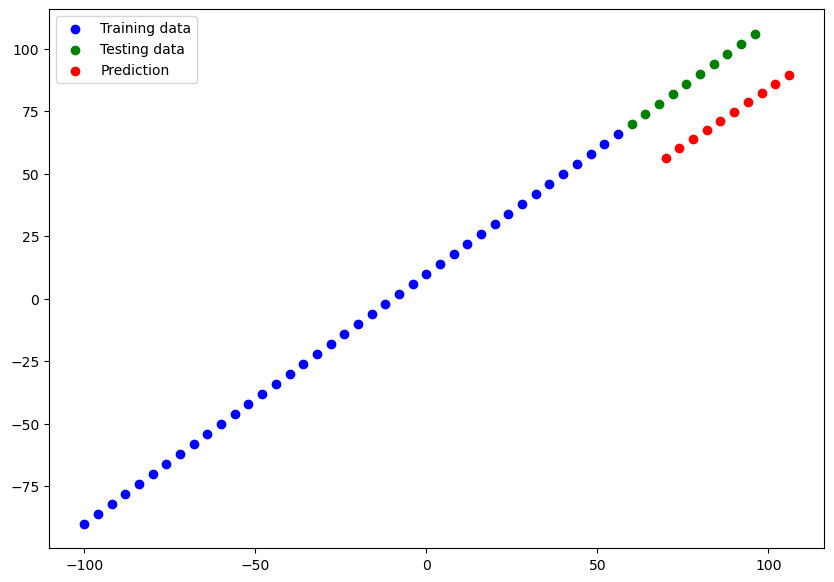

In [27]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

<div id="model_2"></div>

## Model 2

In [31]:
# improve the model, add another model

tf.random.set_seed(42)

# 1. build the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# 2. compile model
model_2.compile(loss=tf.keras.losses.mae, 
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae']
               )

# 3. fit model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 50.7893 - mae: 50.7893
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 28.7876 - mae: 28.7876
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 17.0466 - mae: 17.0466
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 14.3368 - mae: 14.3368
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 16.3351 - mae: 16.3351
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1169 - mae: 11.1169
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 12.1259 - mae: 12.1259
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 10.8939 - mae: 10.8939
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 37.8764 - mae: 37.8764
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 25.4839 - mae: 25.4839
Epoch 11/100
2/2 [==============================] - 0s 4ms/

2/2 [==============================] - 0s 5ms/step - loss: 11.4729 - mae: 11.4729
Epoch 88/100
2/2 [==============================] - 0s 6ms/step - loss: 27.0694 - mae: 27.0694
Epoch 89/100
2/2 [==============================] - 0s 6ms/step - loss: 9.7438 - mae: 9.7438
Epoch 90/100
2/2 [==============================] - 0s 5ms/step - loss: 19.1031 - mae: 19.1031
Epoch 91/100
2/2 [==============================] - 0s 4ms/step - loss: 10.6032 - mae: 10.6032
Epoch 92/100
2/2 [==============================] - 0s 6ms/step - loss: 18.3160 - mae: 18.3160
Epoch 93/100
2/2 [==============================] - 0s 6ms/step - loss: 6.8603 - mae: 6.8603
Epoch 94/100
2/2 [==============================] - 0s 5ms/step - loss: 13.0783 - mae: 13.0783
Epoch 95/100
2/2 [==============================] - 0s 5ms/step - loss: 18.4632 - mae: 18.4632
Epoch 96/100
2/2 [==============================] - 0s 3ms/step - loss: 10.4108 - mae: 10.4108
Epoch 97/100
2/2 [==============================] - 0s 5ms/step - l

In [32]:
y_pred = model_2.predict(X_test)
y_pred

1/1 [==============================] - 0s 53ms/step


array([[ 78.142494],
       [ 83.23738 ],
       [ 88.33229 ],
       [ 93.427185],
       [ 98.52209 ],
       [103.61698 ],
       [108.711876],
       [113.806786],
       [118.90168 ],
       [123.99658 ]], dtype=float32)

In [34]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

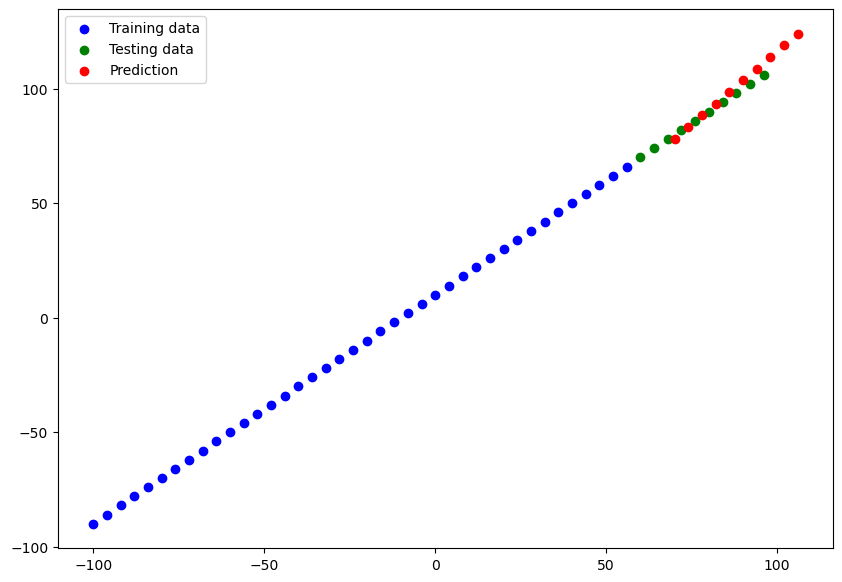

In [39]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

<div id="model_3"></div>

## Model 3

In [40]:
# improve the model, add another model

tf.random.set_seed(42)

# 1. build the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# 2. compile model
model_3.compile(loss=tf.keras.losses.mae, 
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['mae']
               )

# 3. fit model
model_3.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 83.5873 - mae: 83.5873
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 76.9926 - mae: 76.9926
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 70.7587 - mae: 70.7587
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 64.5691 - mae: 64.5691
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 58.6352 - mae: 58.6352
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 52.7873 - mae: 52.7873
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 47.0695 - mae: 47.0695
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 41.2905 - mae: 41.2905
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 35.9743 - mae: 35.9743
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 30.7862 - mae: 30.7862
Epoch 11/100
2/2 [==============================] - 0s 5ms/

2/2 [==============================] - 0s 5ms/step - loss: 3.6343 - mae: 3.6343
Epoch 89/100
2/2 [==============================] - 0s 5ms/step - loss: 3.6025 - mae: 3.6025
Epoch 90/100
2/2 [==============================] - 0s 4ms/step - loss: 3.4401 - mae: 3.4401
Epoch 91/100
2/2 [==============================] - 0s 5ms/step - loss: 3.5032 - mae: 3.5032
Epoch 92/100
2/2 [==============================] - 0s 5ms/step - loss: 3.4038 - mae: 3.4038
Epoch 93/100
2/2 [==============================] - 0s 4ms/step - loss: 3.1946 - mae: 3.1946
Epoch 94/100
2/2 [==============================] - 0s 5ms/step - loss: 3.1022 - mae: 3.1022
Epoch 95/100
2/2 [==============================] - 0s 5ms/step - loss: 3.0248 - mae: 3.0248
Epoch 96/100
2/2 [==============================] - 0s 5ms/step - loss: 2.9383 - mae: 2.9383
Epoch 97/100
2/2 [==============================] - 0s 5ms/step - loss: 2.8323 - mae: 2.8323
Epoch 98/100
2/2 [==============================] - 0s 5ms/step - loss: 2.7658 - ma

In [41]:
y_pred = model_2.predict(X_test)
y_pred

1/1 [==============================] - 0s 36ms/step


array([[ 78.142494],
       [ 83.23738 ],
       [ 88.33229 ],
       [ 93.427185],
       [ 98.52209 ],
       [103.61698 ],
       [108.711876],
       [113.806786],
       [118.90168 ],
       [123.99658 ]], dtype=float32)

In [42]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

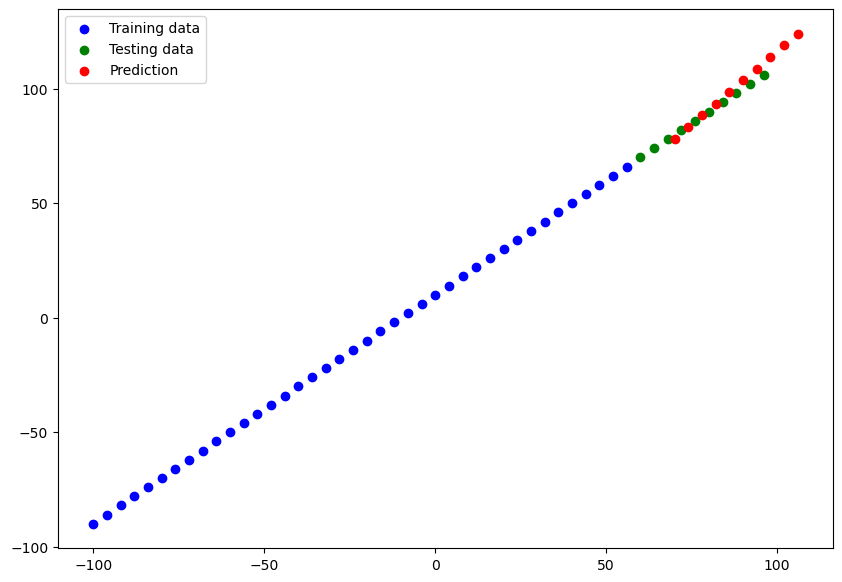

In [43]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)